In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_data = []
Y_labels = []
total_class = 43
cur_dir = os.getcwd()
dataset_dir = os.path.join(cur_dir, "gtsrb-german-traffic-sign")

Using TensorFlow backend.


In [2]:
count = 0
for index in range(total_class):
    path = os.path.join(dataset_dir, 'train', str(index))
    images = os.listdir(path)

# iterating over all images in the folder

    for img in images:
        try:
            if count > 0 and count % 1000 == 0:
                print("[INFO] processed {} total images".format(count))
            # preprocessing the image to size 30x30
            image = Image.open(path + '\\' + img)
            image = image.resize((30, 30))
            image = np.array(image)

            X_data.append(image)
            Y_labels.append(index)
            count+=1
        except:
                print("Error loading image")

X_data = np.array(X_data)
Y_labels = np.array(Y_labels)

print(X_data.shape, Y_labels.shape)

[INFO] processed 1000 total images
[INFO] processed 2000 total images
[INFO] processed 3000 total images
[INFO] processed 4000 total images
[INFO] processed 5000 total images
[INFO] processed 6000 total images
[INFO] processed 7000 total images
[INFO] processed 8000 total images
[INFO] processed 9000 total images
[INFO] processed 10000 total images
[INFO] processed 11000 total images
[INFO] processed 12000 total images
[INFO] processed 13000 total images
[INFO] processed 14000 total images
[INFO] processed 15000 total images
[INFO] processed 16000 total images
[INFO] processed 17000 total images
[INFO] processed 18000 total images
[INFO] processed 19000 total images
[INFO] processed 20000 total images
[INFO] processed 21000 total images
[INFO] processed 22000 total images
[INFO] processed 23000 total images
[INFO] processed 24000 total images
[INFO] processed 25000 total images
[INFO] processed 26000 total images
[INFO] processed 27000 total images
[INFO] processed 28000 total images
[

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_labels, test_size=0.2, random_state=42)

print("Shape of x_train: ", x_train.shape, " and y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape, " and y_test: ", y_test.shape)

# one hot encoding the labels

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Shape of x_train:  (31367, 30, 30, 3)  and y_train:  (31367,)
Shape of x_test:  (7842, 30, 30, 3)  and y_test:  (7842,)


In [4]:
# contruct model with dropout layers to avoid over fitting
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(total_class, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [5]:
NUM_EPOCHS = 15
BS = 64

history = model.fit(x_train, y_train, batch_size=BS, epochs=NUM_EPOCHS, validation_data=(x_test, y_test))
model.save('ModelB_traffic_signnet_classifier.h5')

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 51s 2ms/step - loss: 1.6513 - accuracy: 0.6245 - val_loss: 0.3122 - val_accuracy: 0.9259
Epoch 2/15
31367/31367 [==============================] - 55s 2ms/step - loss: 0.3242 - accuracy: 0.9163 - val_loss: 0.1196 - val_accuracy: 0.9722
Epoch 3/15
31367/31367 [==============================] - 50s 2ms/step - loss: 0.1957 - accuracy: 0.9483 - val_loss: 0.1011 - val_accuracy: 0.9742
Epoch 4/15
31367/31367 [==============================] - 46s 1ms/step - loss: 0.1531 - accuracy: 0.9594 - val_loss: 0.0703 - val_accuracy: 0.9836
Epoch 5/15
31367/31367 [==============================] - 46s 1ms/step - loss: 0.1262 - accuracy: 0.9664 - val_loss: 0.0837 - val_accuracy: 0.9806
Epoch 6/15
31367/31367 [==============================] - 46s 1ms/step - loss: 0.1111 - accuracy: 0.9715 - val_loss: 0.0567 - val_accuracy: 0.9874
Epoch 7/15
31367/31367 [==============================] - 46s 1ms/ste

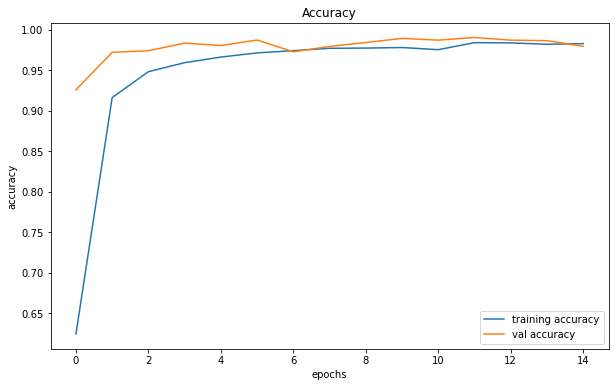

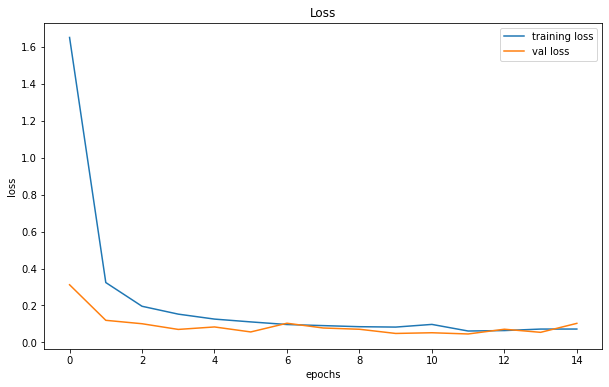

In [6]:
plt.figure(0, figsize=(10, 6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1, figsize=(10, 6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
# Testing the model

from sklearn.metrics import accuracy_score

test = pd.read_csv(os.path.join(dataset_dir, 'Test.csv'))

labels = test["ClassId"].values
img_paths = test["Path"].values

test_data = []
for path in img_paths:
    image = Image.open(os.path.join(dataset_dir, path))
    image = image.resize((30, 30))
    test_data.append(np.array(image))

test_data = np.array(test_data)
pred = model.predict_classes(test_data)

# Accuracy with test data

score = accuracy_score(labels, pred)
print(f"{score:.3%}")

94.521%


In [8]:
from sklearn.metrics import classification_report

# load the label names
label_names = open("signnames.csv").read().strip().split("\n")[1:]
label_names = [l.split(",")[1] for l in label_names]

# evaluate the network
print("[INFO] Evaluating network...")
predictions = model.predict(x_test, batch_size=BS)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=label_names))

[INFO] Evaluating network...
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.92      0.96        38
                              Speed limit (30km/h)       0.96      0.99      0.97       496
                              Speed limit (50km/h)       1.00      0.95      0.97       450
                              Speed limit (60km/h)       0.99      0.98      0.99       280
                              Speed limit (70km/h)       0.98      0.99      0.99       418
                              Speed limit (80km/h)       0.96      0.96      0.96       364
                       End of speed limit (80km/h)       0.97      1.00      0.98        59
                             Speed limit (100km/h)       0.96      0.97      0.97       278
                             Speed limit (120km/h)       0.99      0.97      0.98       301
                                        No passing

In [9]:
from skimage import exposure, transform, io
from skimage.transform import rescale
import cv2
import random

label_names = open("signnames.csv").read().strip().split("\n")[1:]
label_names = [l.split(",")[1] for l in label_names]

test = pd.read_csv(os.path.join(dataset_dir, 'Test.csv'))
img_paths = "gtsrb-german-traffic-sign\\" + test["Path"].values
random.shuffle(img_paths)
img_paths = img_paths[:25]

for i, img_path in enumerate(img_paths):
    image = Image.open(img_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)

    # make predictions using the traffic sign recognizer CNN
    preds = model.predict_classes(image)
    label = label_names[preds[0]]
    print(label)
    # load the image using OpenCV, resize it, and draw the label on it
    image = cv2.imread(img_path) 
    scale_percent = 300 # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    cv2.putText(image, label, (5, 50), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, (0, 0, 255), 1, cv2.LINE_AA)

    # save the image to disk
    p = os.path.sep.join(["predictions", "{}.png".format(label)])
    cv2.imwrite(p, image)

No entry
Speed limit (80km/h)
Keep right
Speed limit (60km/h)
Right-of-way at the next intersection
No passing for vehicles over 3.5 metric tons
Stop
Wild animals crossing
Speed limit (30km/h)
Traffic signals
General caution
Yield
Beware of ice/snow
No passing for vehicles over 3.5 metric tons
Speed limit (30km/h)
Yield
No entry
Speed limit (70km/h)
No entry
Speed limit (30km/h)
Yield
No passing
Speed limit (120km/h)
Traffic signals
Turn left ahead
